In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from keras.models import load_model
model = load_model(r'/content/LungCancerClassification-cnn.h5')
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 30752)             0         
                                                                 
 dense_17 (Dense)            (None, 32)                984096    
                                                                 
 dense_18 (Dense)            (None, 3)                 99        
                                                                 
Total params: 985091 (3.76 MB)
Trainable params: 985091 (3.76 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

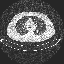

In [ ]:
from keras.preprocessing import image
img = image.load_img('/content/TestImage_Metastatic.jpg', target_size=(64,64))

img

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
ig = ImageDataGenerator(rescale=1./255)

In [ ]:
from keras.preprocessing import image
import numpy as np
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
newimg = ig.flow(img_array)

newimg

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
    )
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_path  = '/content/drive/My Drive/Lun_ML_Project/Image dataset/Train_Data'
test_path = '/content/drive/My Drive/Lun_ML_Project/Image dataset/Test_Data'
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 120 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [18]:
predictions = model.predict(newimg)
predicted_class = np.argmax(predictions[0])

predictions

1/1 [==============================] - 0s 59ms/step


array([[0.3117565 , 0.12990934, 0.55833423]], dtype=float32)

In [21]:
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class]
predicted_label

'metastatic'

In [23]:
print(f"The image belongs to class: {predicted_label}")

if (predicted_label=='metastatic'):
  print("Metastatic - Non Cancerous")
elif (predicted_label=='Malignant'):
    print("Malignant - Cancerous")
else:
    print("Benign - Cancerous")

print(f"Collect the Doctor's Opinion")

The image belongs to class: metastatic
Metastatic - Non Cancerous
Collect the Doctor's Opinion


In [24]:
Doctor_Opinion = input("Enter the Doctor's Opinion")
print(Doctor_Opinion)

Enter the Doctor's OpinionHealthy Diet is advised
Healthy Diet is advised
